In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [12]:
data  = pd.read_csv('./data/ex2data2.txt',names = ['Test1','Test2','Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


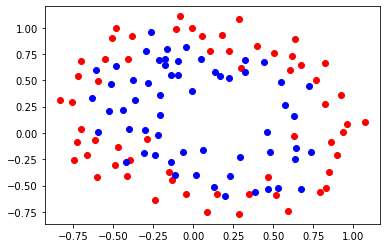

In [13]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'],data[data['Accepted']==0]['Test2'],c = 'r')
ax.scatter(data[data['Accepted']==1]['Test1'],data[data['Accepted']==1]['Test2'],c = 'b')
plt.show()

In [14]:
x_data = data.iloc[:,:-1].values
a_data = data.iloc[:,-1].values

In [15]:
x_data.shape

(118, 2)

In [16]:
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(x_data)
x_poly.shape

(118, 28)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(x_poly,a_data.astype(str))

LogisticRegression()

In [19]:
model.score(x_poly,a_data.reshape(-1,1).astype(str))

0.8305084745762712

In [31]:
x = np.linspace(-1.2,1.2,100)
xx,yy= np.meshgrid(x,x)
print(xx.shape,yy.shape)
print(np.c_[xx,xx].shape)
print(poly.fit_transform(np.c_[x,x]).shape)

(100, 100) (100, 100)
(100, 200)
(100, 28)


In [32]:
z = model.predict(poly.fit_transform(np.c_[x,x])) 
print(z.shape)
zz = z.reshape(100,2)
print(zz.shape)
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Test1'],data[data['Accepted']==0]['Test2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Test1'],data[data['Accepted']==1]['Test2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()
ax.set(xlabel='Exam1',ylabel='Exam2')

plt.contour(xx,yy,zz,0) #等高线图
plt.show()


(100,)


ValueError: cannot reshape array of size 100 into shape (100,2)